In [80]:
import os
import importlib.util
scripts_path = os.path.abspath('../scripts')
spec = importlib.util.spec_from_file_location("helpers", os.path.join(scripts_path, "helpers.py"))
helpers = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helpers)

scripts_path = os.path.abspath('../')
spec = importlib.util.spec_from_file_location("FourthDownPrediction", os.path.join(scripts_path, "FourthDownPrediction.py"))
FourthDownPrediction = importlib.util.module_from_spec(spec)
spec.loader.exec_module(FourthDownPrediction)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [81]:
_, X_test, _, y_test_a = helpers.attempt_data_split()
_, _, _, y_test_c = helpers.convert_data_split()

In [82]:
labels = ['RandomForest', 'RandomForestCV', 'KNN', 'KNNCV', 'NeuralNetwork']
prediction_map_attempt = {}
prediction_map_convert = {}

for label in labels:
    prediction_map_attempt[label] = FourthDownPrediction.FourthDownPrediction(play_model=label).predict_play(X_test)
    prediction_map_convert[label] = FourthDownPrediction.FourthDownPrediction(play_model=label).predict_play(X_test, include_conversion=True)

/Users/loganpfahler/Spring 2023/Machine Learning/ML-final-project/scripts/nn_models.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_output = self.log_softmax(x)
/Users/loganpfahler/Spring 2023/Machine Learning/ML-final-project/scripts/nn_models.py:58: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  y_output = self.log_softmax(x)


# Accuracy Graph

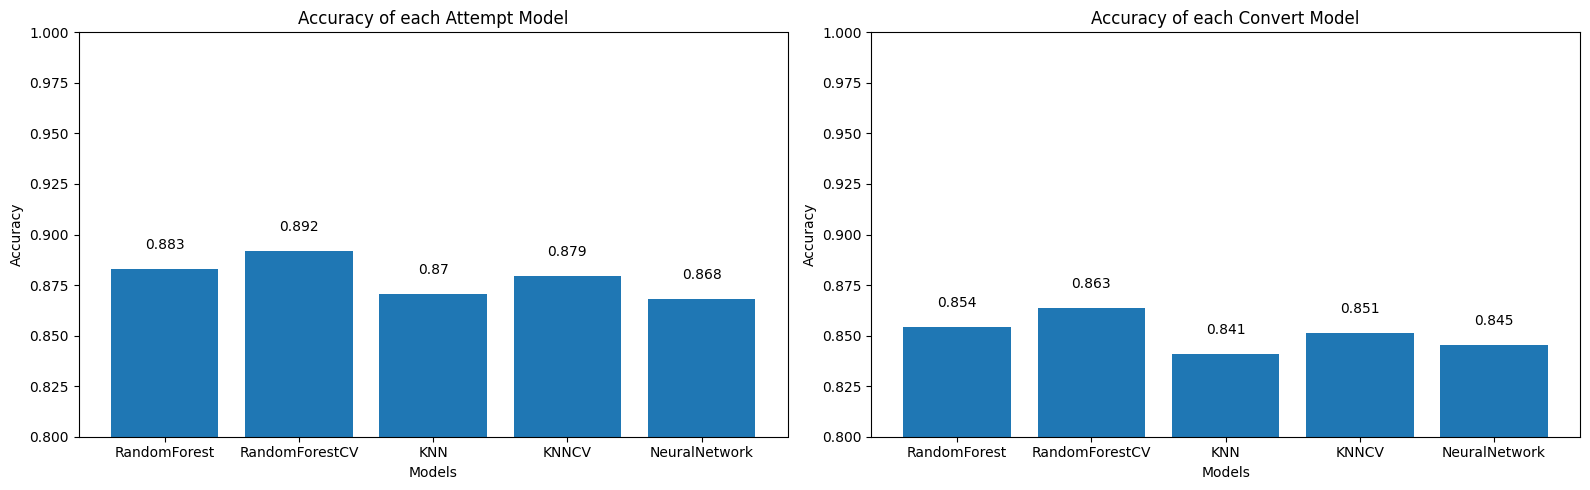

In [83]:
# Attept graph
scores1 = []

for label in labels:
    scores1.append(accuracy_score(y_test_a, prediction_map_attempt[label]))

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

bars1 = ax[0].bar(labels, scores1)
ax[0].set_title('Accuracy of each Attempt Model')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.8, 1)

# Add labels to the bars
for i, bar in enumerate(bars1):
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(scores1[i], 3), ha='center')

# Convert graph
scores2 = []

for label in labels:
    scores2.append(accuracy_score(y_test_c, prediction_map_convert[label]))

bars2 = ax[1].bar(labels, scores2)
ax[1].set_title('Accuracy of each Convert Model')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0.8, 1)

# Add labels to the bars
for i, bar in enumerate(bars2):
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(scores2[i], 3), ha='center')

plt.tight_layout()
plt.show()

# Confusion Matrix Attempt

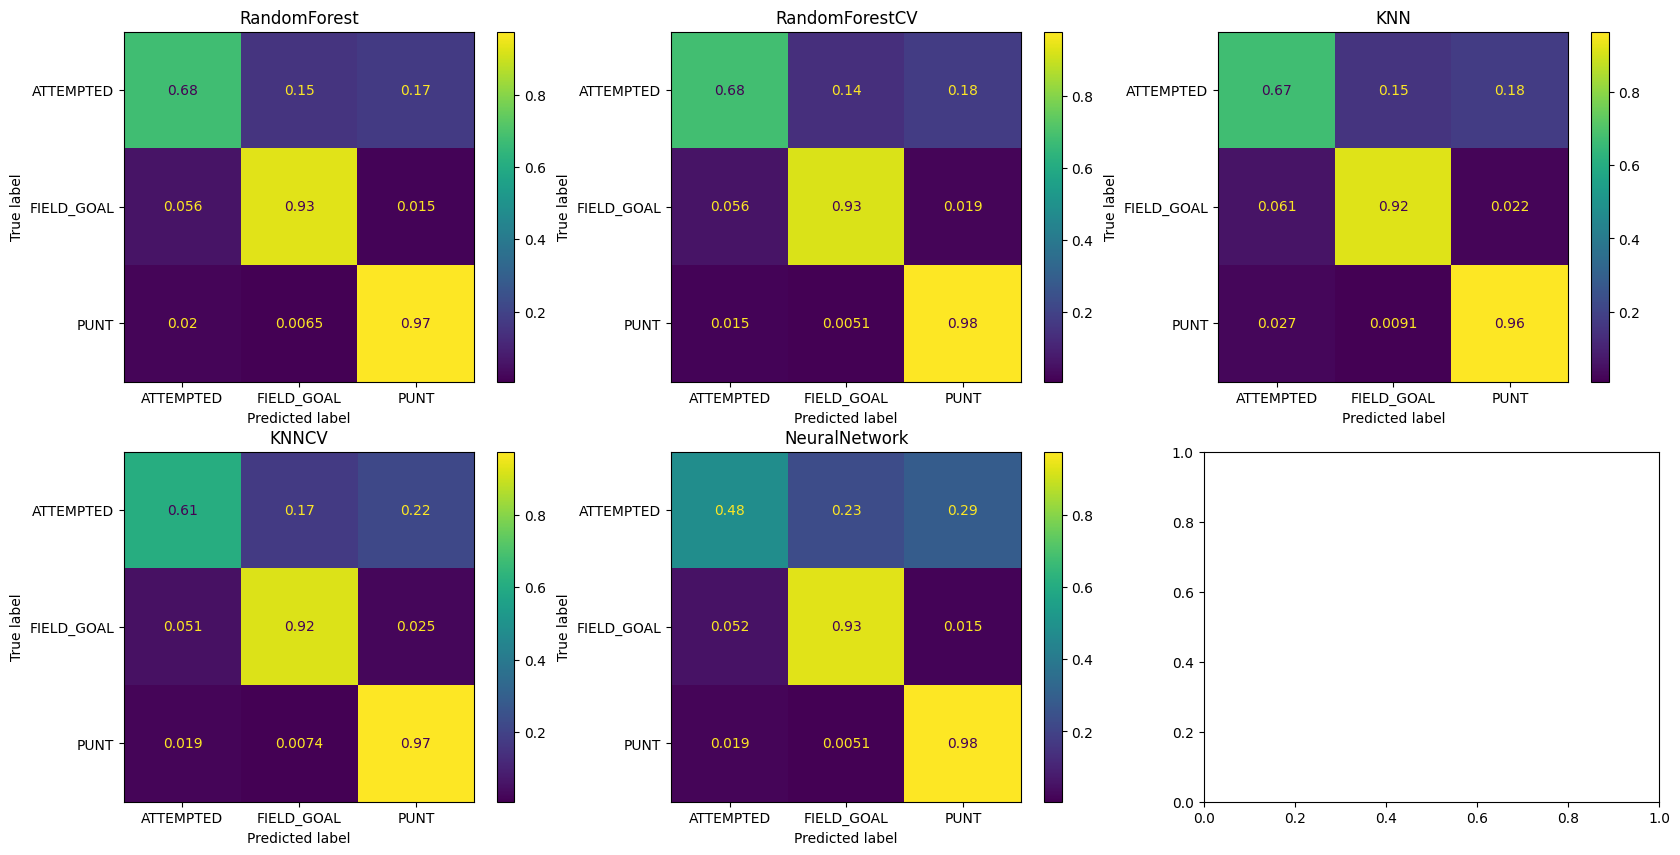

In [98]:
fig, axs = plt.subplots(nrows=(len(labels) + 2)//3, ncols=3, figsize=(20, 10))

for i, label in enumerate(labels):
    classes = ['ATTEMPTED', 'FIELD_GOAL', 'PUNT']
    cm1 = confusion_matrix(y_test_a, prediction_map_attempt[label], labels=classes, normalize='true')
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=classes)
    disp1.plot(ax=axs[i//3][i%3])
    axs[i//3][i%3].set_title(label)

# Show the figure
plt.show()

# Confusion Matrix Convert

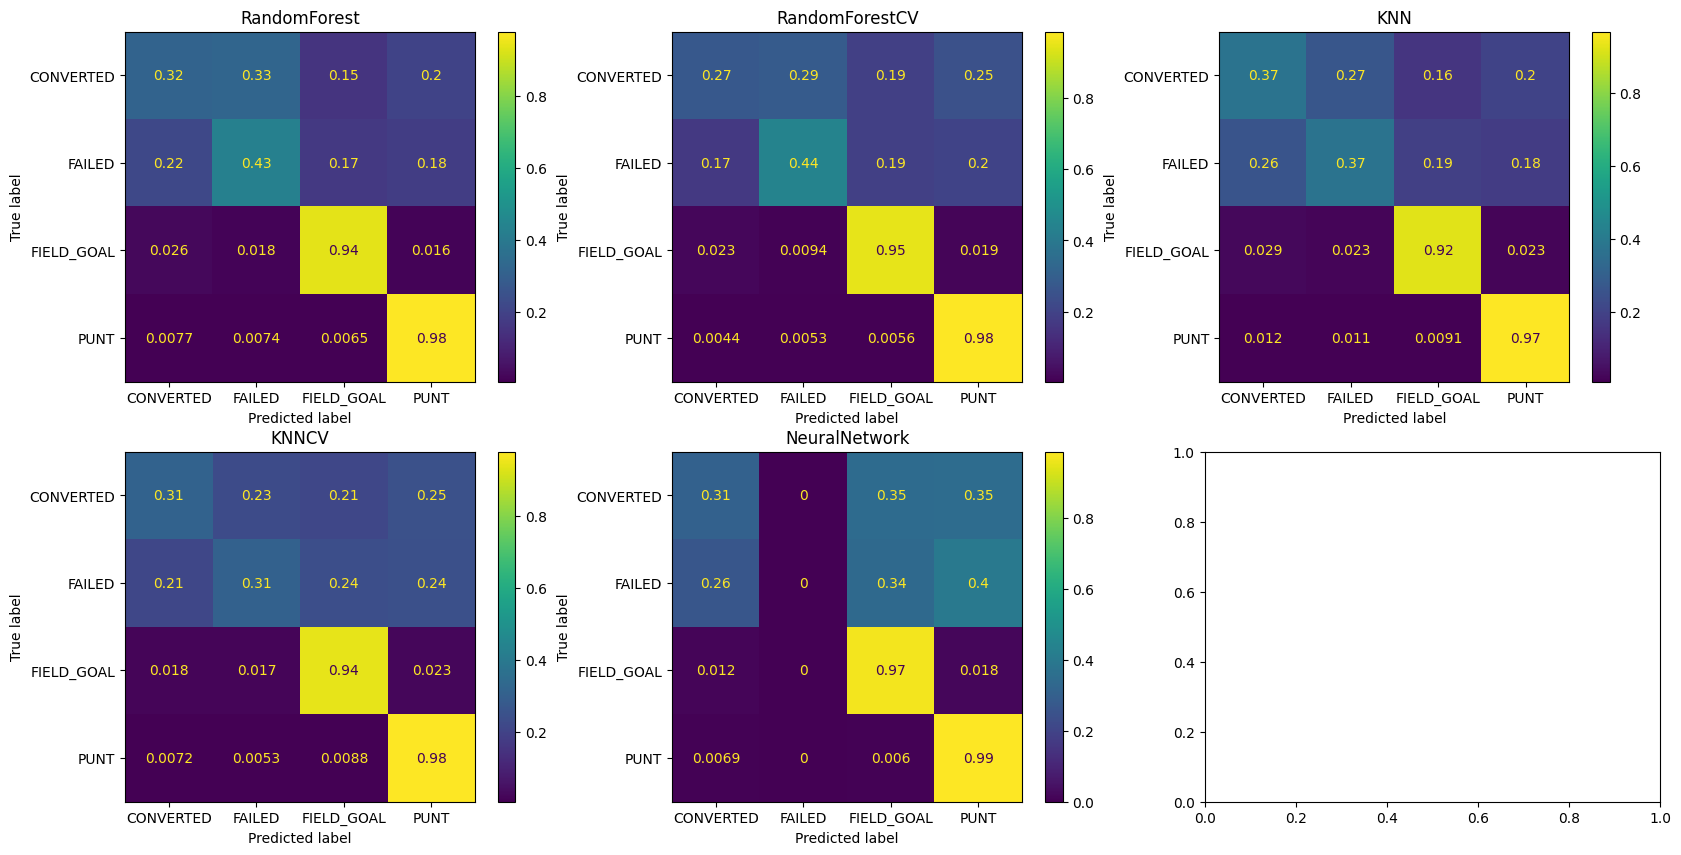

In [101]:
fig, axs = plt.subplots(nrows=(len(labels) + 2)//3, ncols=3, figsize=(20, 10))

for i, label in enumerate(labels):
    classes = ['CONVERTED', 'FAILED', 'FIELD_GOAL', 'PUNT']
    cm1 = confusion_matrix(y_test_c, prediction_map_convert[label], labels=classes, normalize='true')
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=classes)
    disp1.plot(ax=axs[i//3][i%3])
    axs[i//3][i%3].set_title(label)

# Show the figure
plt.show()